In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset

full_data = pd.merge(mouse_drug_data, clinical_trial_data, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

full_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
clinical_trial_data.sort_values(['Mouse ID', 'Timepoint']).head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
113,a203,0,45.000000,0
389,a203,5,48.508468,0
598,a203,10,51.852437,1
758,a203,15,52.777870,1
1018,a203,20,55.173336,1


In [3]:
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumorvol = full_data.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame

tumvoldf = pd.DataFrame(tumorvol.mean()).reset_index()

# Preview DataFrame

tumvoldf.head()


,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [5]:
#Checking the max timepoint:


full_data['Timepoint'].max()



45

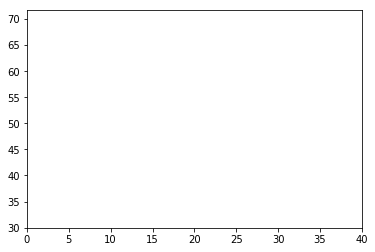

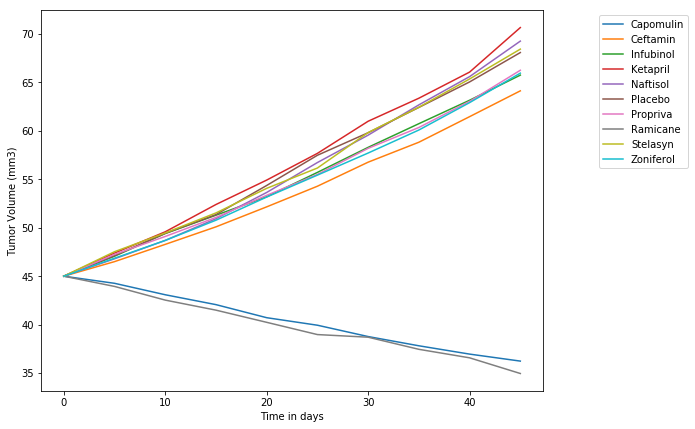

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [6]:
timepoint = np.arange(0,50,5)
druglist= list(tumvoldf['Drug'].unique())
tumvolmax = tumvoldf['Tumor Volume (mm3)'].max()
tumvolmin = tumvoldf['Tumor Volume (mm3)'].min()


vol= []
for drug in druglist:
    for i in range(len(tumvoldf)):
        if tumvoldf['Drug'][i]== drug:
            
            vol.append(tumvoldf['Tumor Volume (mm3)'][i])
    
    
plt.axis([0,40,tumvolmin-5,tumvolmax+1])
plt.figure(figsize = (9,7))
plt.xlabel('Time in days')
plt.ylabel('Tumor Volume (mm3)')

for i in range(len(druglist)):

    plt.plot(tumvoldf.loc[tumvoldf['Drug']== druglist[i]]['Timepoint'],
             tumvoldf.loc[tumvoldf['Drug']== druglist[i]]['Tumor Volume (mm3)'],
             label = druglist[i])

plt.legend(loc= 9, bbox_to_anchor=(1.2, 1), ncol=1)
plt.show()



#druglist
timepoint

In [7]:
tumvoldf.loc[tumvoldf['Drug']== 'Capomulin']['Tumor Volume (mm3)']

0    45.000000
1    44.266086
2    43.084291
3    42.064317
4    40.716325
5    39.939528
6    38.769339
7    37.816839
8    36.958001
9    36.236114
Name: Tumor Volume (mm3), dtype: float64

In [8]:
tumvoldf['Standard Error by Drug'] = 0
tumvoldf['Standard Error by Timepoint'] = 0

#This next function is because the original "timepoint" range was larger so that the graph would look nice.


# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

#first, we do standard error by drug:

errorlist = []    
    
for i in range(len(druglist)):
    errorlist.append((druglist[i],
                      pd.DataFrame.sem(tumvoldf.loc[tumvoldf['Drug'] == druglist[i]]['Tumor Volume (mm3)'])))

errordict = dict(errorlist)

tumvoldf['Standard Error by Drug'] = tumvoldf['Drug'].map(errordict)
    
errordict

{'Capomulin': 0.9709032345000091,
 'Ceftamin': 2.0477566291416047,
 'Infubinol': 2.2059693464844665,
 'Ketapril': 2.6717278012693644,
 'Naftisol': 2.6166913913052583,
 'Placebo': 2.479069389766859,
 'Propriva': 2.220041941321588,
 'Ramicane': 1.0310307963891479,
 'Stelasyn': 2.4891561307817645,
 'Zoniferol': 2.2173282570545467}

In [9]:
tumvoldf.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,Standard Error by Drug,Standard Error by Timepoint
0,Capomulin,0,45.000000,0.000000,0.970903,0
1,Capomulin,5,44.266086,0.160000,0.970903,0
2,Capomulin,10,43.084291,0.320000,0.970903,0
3,Capomulin,15,42.064317,0.375000,0.970903,0
4,Capomulin,20,40.716325,0.652174,0.970903,0


In [10]:
timepoint

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [11]:
  
    
#Next, we do standard error by timepoint :   
    
errorlist1 = []
timelist = list(timepoint)

for i in range(len(timelist)):
    errorlist1.append((timelist[i],
                      pd.DataFrame.sem(tumvoldf.loc[tumvoldf['Timepoint'] == timelist[i]]['Tumor Volume (mm3)'])))

errordict1 = dict(errorlist1)

tumvoldf['Standard Error by Timepoint'] = tumvoldf['Timepoint'].map(errordict1)


#Note: this function takes a few seconds to run, but it works.

# Convert to DataFrame

# Preview DataFrame


tumvoldf

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,Standard Error by Drug,Standard Error by Timepoint
0,Capomulin,0,45.000000,0.000000,0.970903,0.000000
1,Capomulin,5,44.266086,0.160000,0.970903,0.406023
2,Capomulin,10,43.084291,0.320000,0.970903,0.847590
3,Capomulin,15,42.064317,0.375000,0.970903,1.267932
4,Capomulin,20,40.716325,0.652174,0.970903,1.767119
5,Capomulin,25,39.939528,0.818182,0.970903,2.246033
6,Capomulin,30,38.769339,1.090909,0.970903,2.715352
7,Capomulin,35,37.816839,1.181818,0.970903,3.194941
8,Capomulin,40,36.958001,1.380952,0.970903,3.671255
9,Capomulin,45,36.236114,1.476190,0.970903,4.273236


In [12]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [13]:
# Generate the Plot (with Error Bars)

# Save the Figure



In [14]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [15]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [16]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [17]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [18]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [20]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [21]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [22]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [23]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined